<a href="https://colab.research.google.com/github/harim4422/tensorflow2_deeplearning/blob/master/cnn_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
ls -1ha kaggle.json

kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                                                deadline             category             reward  teamCount  userHasEntered  
-----------------------------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
digit-recognizer                                                   2030-01-01 00:00:00  Getting Started   Knowledge       2424           False  
titanic                                                            2030-01-01 00:00:00  Getting Started   Knowledge      16229            True  
house-prices-advanced-regression-techniques                        2030-01-01 00:00:00  Getting Started   Knowledge       4930           False  
connectx                                                           2030-01-01 00:00:00  Getting Started   Knowledge        444           False  
imagenet-object-localization-challenge                             2029-12-31 07:00:00  Research          Knowledge         64    

In [0]:
!ls

annotation.txt		     sample_data
characters_illustration.png  simpsons_dataset
kaggle.json		     the-simpsons-characters-dataset.zip
kaggle_simpson_testset	     weights.best.hdf5
number_pic_char.csv


In [0]:
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset

 99% 1.07G/1.08G [00:17<00:00, 88.8MB/s]
100% 1.08G/1.08G [00:17<00:00, 66.2MB/s]


In [0]:
!unzip the-simpsons-characters-dataset.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1271.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1272.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1273.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1274.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1275.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1276.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1277.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1278.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1279.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1280.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1281.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1282.jpg  
  inflating: simpsons_dataset/simpsons_dataset/moe_szyslak/pic_1283.jpg  
  

In [0]:
!ls

annotation.txt		     sample_data
characters_illustration.png  simpsons_dataset
kaggle.json		     the-simpsons-characters-dataset.zip
kaggle_simpson_testset	     weights.best.hdf5
number_pic_char.csv


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

TensorFlow 2.x selected.


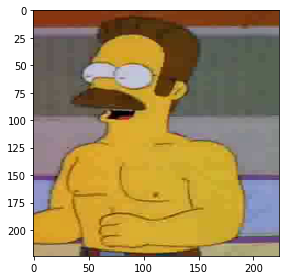

In [0]:
from skimage import data, io, filters
import cv2
img_ex = io.imread("simpsons_dataset/simpsons_dataset/ned_flanders/pic_0888.jpg")
img_resized = cv2.resize(img_ex,(224,224))
io.imshow(img_resized)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


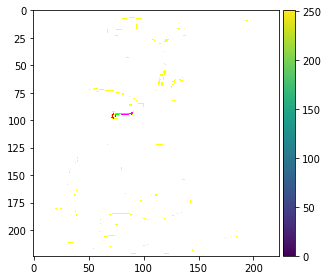

In [0]:
img_resized2 = cv2.resize(img_ex,(224,224)).astype(np.float32)
io.imshow(img_resized2)

In [0]:
print(img_ex.shape)
print(img_resized.shape)

(416, 288, 3)
(224, 224, 3)


In [0]:
directory = 'simpsons_dataset/simpsons_dataset/'
label = []
images = []
category = []
num_class = 20

In [0]:
# Simpson Data Address & Label 만들기
for name in os.listdir(directory)[0:num_class]:
  current_class = directory+name
  character = os.listdir(current_class)
  category.append(name)
  for c in character:
    images.append(current_class+'/'+c)
    label.append(name)

In [0]:
print(category)
print(len(category))

['mayor_quimby', 'agnes_skinner', 'waylon_smithers', 'chief_wiggum', 'groundskeeper_willie', 'carl_carlson', 'moe_szyslak', 'snake_jailbird', 'cletus_spuckler', 'milhouse_van_houten', 'selma_bouvier', 'bart_simpson', 'charles_montgomery_burns', 'maggie_simpson', 'troy_mcclure', 'martin_prince', 'otto_mann', 'lisa_simpson', 'sideshow_bob', 'lenny_leonard']
20


In [0]:
# Label Encording
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = np.array(label).reshape(-1,)
le.fit(y) # 1차원 배열로 정돈후 인코더에 적용
y = le.transform(y)

y_train = np.zeros((len(y),num_class)) # (데이터 수 * class 개수)크기의 0행렬
for i, j in enumerate(y):
    y_train[i][j] = 1

x_train = np.zeros((len(y_train), 224, 224, 3)).astype(np.float32)
for i, j in enumerate(images):
  img = io.imread(j) / 255.0
  resized_image = cv2.resize(img,(224,224)).astype(np.float32)
  x_train[i] = resized_image

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(input_shape=(224, 224, 3), kernel_size=(3, 3), filters=32, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=256, padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=512, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(units=20, activation='softmax'))

In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 110, 110, 256)     295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 256)       0

In [0]:
history = model.fit(x_train, y_train, epochs=25, validation_split=0.25)

Train on 7293 samples, validate on 2432 samples
Epoch 1/25
7293/7293 [==============================] - 48s 7ms/sample - loss: 2.2377 - accuracy: 0.2428 - val_loss: 3.7219 - val_accuracy: 0.0000e+00
Epoch 2/25
7293/7293 [==============================] - 39s 5ms/sample - loss: 1.9411 - accuracy: 0.4044 - val_loss: 4.8020 - val_accuracy: 0.0000e+00
Epoch 3/25
7293/7293 [==============================] - 39s 5ms/sample - loss: 1.7413 - accuracy: 0.4925 - val_loss: 4.6729 - val_accuracy: 0.0000e+00
Epoch 4/25
7293/7293 [==============================] - 39s 5ms/sample - loss: 1.5678 - accuracy: 0.5441 - val_loss: 4.5398 - val_accuracy: 0.0000e+00
Epoch 5/25
7293/7293 [==============================] - 39s 5ms/sample - loss: 1.3917 - accuracy: 0.5904 - val_loss: 4.0084 - val_accuracy: 0.0000e+00
Epoch 6/25
7293/7293 [==============================] - 39s 5ms/sample - loss: 1.2405 - accuracy: 0.6296 - val_loss: 3.8310 - val_accuracy: 0.0033
Epoch 7/25
7293/7293 [============================

In [0]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

NameError: ignored

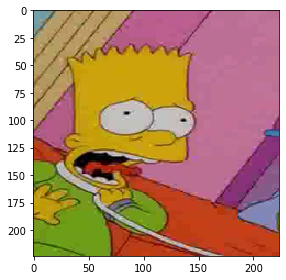

In [0]:
img_bart = io.imread("simpsons_dataset/simpsons_dataset/bart_simpson/pic_0016.jpg")
img_resized = cv2.resize(img_bart,(224,224))
io.imshow(img_resized)

In [0]:
y_pred = model.predict(np.expand_dims(img_resized, axis=0))
print(y_pred)
print(le.inverse_transform(np.array([np.argmax(y_pred)])))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
['bart_simpson']
